In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
housing = pd.read_csv('train.csv')


#### Take a Quick Look at the Data Structure

In [3]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Get the shape of data
housing.shape

(1460, 80)

In [ ]:
# There are only 1460 training examples in the dataset, which means that it is small by machine learning standards.
# The shape of the dataset also tells is that we have 81 attributes. Of the 81 attributes, one is the Id for the 
# houses – not useful as a feature – and one is the target variable, SalePrice, that the model should predict. 
# This means that we have 79 attributes that have the potential to be used to train our predictive model.

The "shape" of the dataset shows that it has 1460 rows/instances, with data from 81 attributes. 
Out of the 80 attributes, one is the target (SalePrice) that the model should predict. 
Hence, there are 79 attributes that may be used for feature selection/engineering.

In [7]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Each row represents one house. We can see that we have both numerical (e.g., LotFrontage) and categorical 
# attributes (e.g., LotShape). We also notice that we have many missing values (NaN) as not all the houses have 
# values set for all the attributes.

# We have a column called Id which is not useful as an attribute. We can either omit it or use it as an index for 
# our DataFrame. We are going to drop that column because indexes of houses are not relevant for this problem anyway.

# The info() method is useful to get a quick description of the data, in particular the total number of rows, each 
# attribute’s type and number of non-null values. So let’s drop the Id column and call the info() method:

In [12]:
housing = housing.drop("Id", axis=1)
housing.info()

# The info() method tells us that we have 37 numerical attributes, 3 float64 and 34 int64, and 43 categorical 
# columns. Notice that we have many attributes that are not set for most of the houses. For example, the Alley 
# attribute has only 91 non-null values, meaning that all other houses are missing this feature. We will need to 
# take care of this later.

In [13]:
# List of numerical attributes
housing.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
len(housing.select_dtypes(exclude=['object']).columns)

37

In [15]:
# Get the data summary with upto 2 decimals and call transpose() for a better view of the results
housing.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


In [17]:
# Get the categorical attributes
housing.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are 43 categorical columns with the following characteristics:

In [18]:
#Get the sumamry of categorical attributes
housing.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


#### Exploring Numerical Columns

In [19]:
# Statistics summary of our target variable
# Descriptive statistics summary
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew of target column
It appears to be good practice to minimise the skew of the dataset. The reason often given is that skewed data adversely affects the prediction accuracy of regression models. 
Note: While important for linear regression, correcting skew is not necessary for Decisions Trees and Random Forests. 

(Not a needed step for target var, while we can scale the other numerical features)

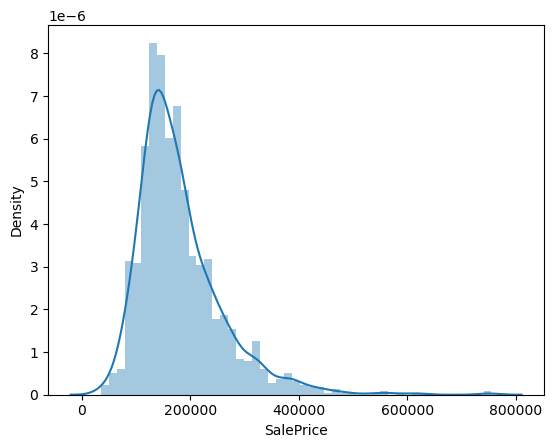

In [20]:
# Get the distribution plot
sns.distplot(housing['SalePrice']);

In [ ]:
# The distribution plot tells us that we have a skewed variable. In fact from the statistical summary, 
# we already saw that the mean price is about 181K while 50% of the houses were sold for less than 163K.

# When dealing with skewed variables, it is a good practice to reduce the skew of the dataset because it can impact 
# the accuracy of the model. This is an important step if we are going to use linear regression modeling; other 
# algorithms, like tree-based Random Forests can handle skewed data. We will understand this in detail later under 
# “Feature Scaling”. For now, let’s look at the updated distribution of our target variable once we apply a log 
# transformation to it. Applying a log transformation means to simply take the log of the skewed variable to 
# improve the fit by altering the scale and making the variable more normally distributed.

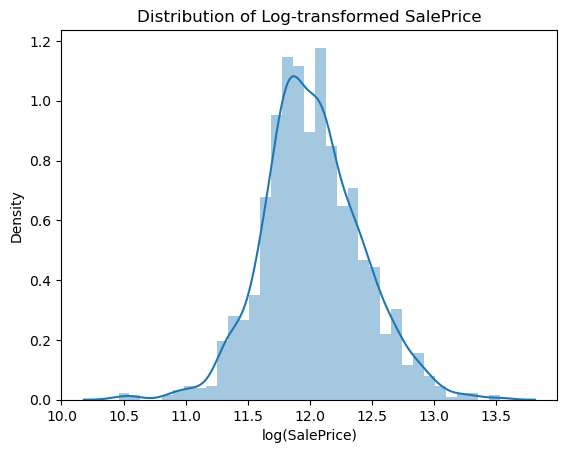

In [21]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [ ]:
# We can clearly see that the log-transformed variable is more normally distributed and we have managed to reduce 
# the skew.

# What about all the other numerical variables? What do their distributions look like? We can plot the distributions
# of all the numerical variables by calling the distplot() method in a for loop, like so:

36


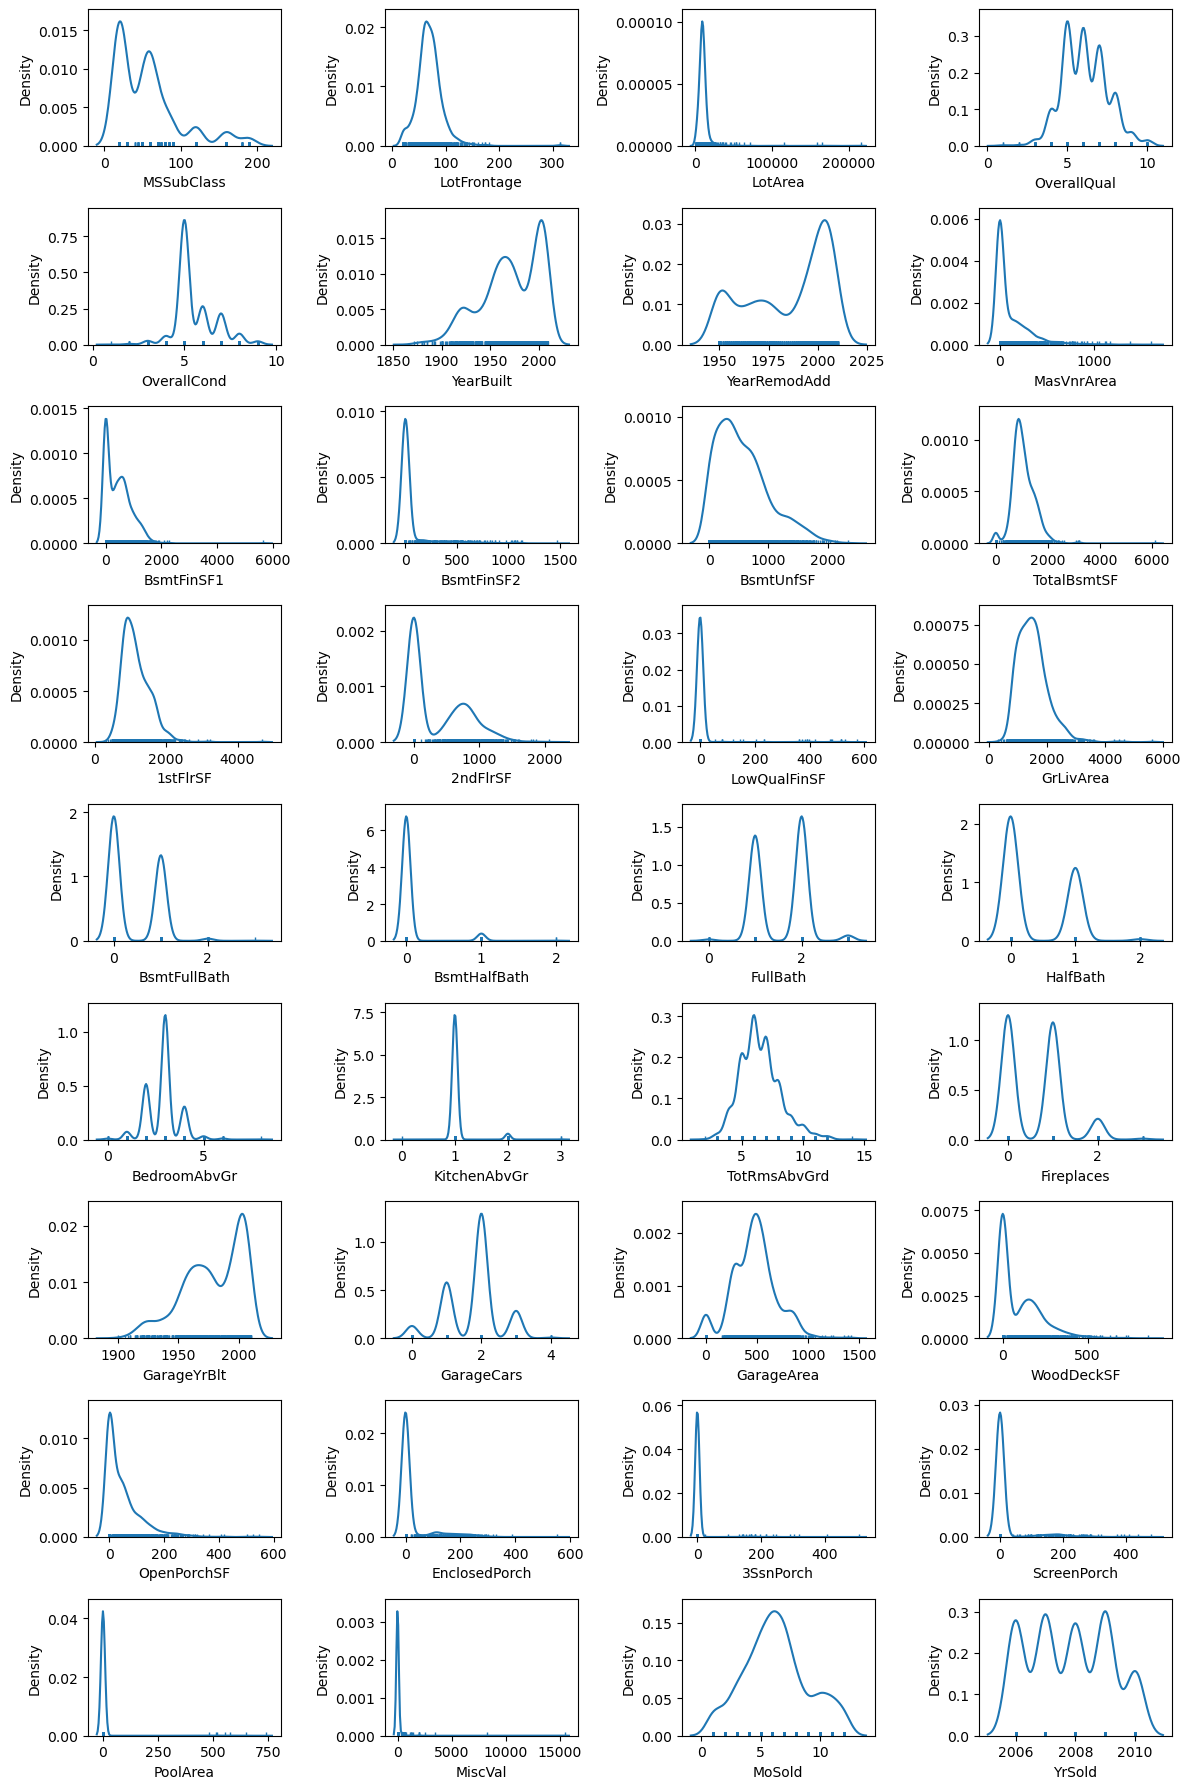

In [22]:
## What about the distribution of all the other numerical variables?

num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()

# Print num of variables to make sure we didn't mess up in the last step
print(len(num_attributes.columns))

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

In [23]:
# Notice how varying the distributions and scales for the different variables are ,this is the reason we need to do
# feature scaling before we can use these features for modeling. For example, we can clearly see how skewed LotArea 
# is. It is in dire need of some polishing before it can be used for learning.

# 📝 We will get back to all the needed transformations and “applying the fixes” later. In this exploratory analysis
# steps, we are just taking notes on what we need to take care of in order to create a good predictive model.

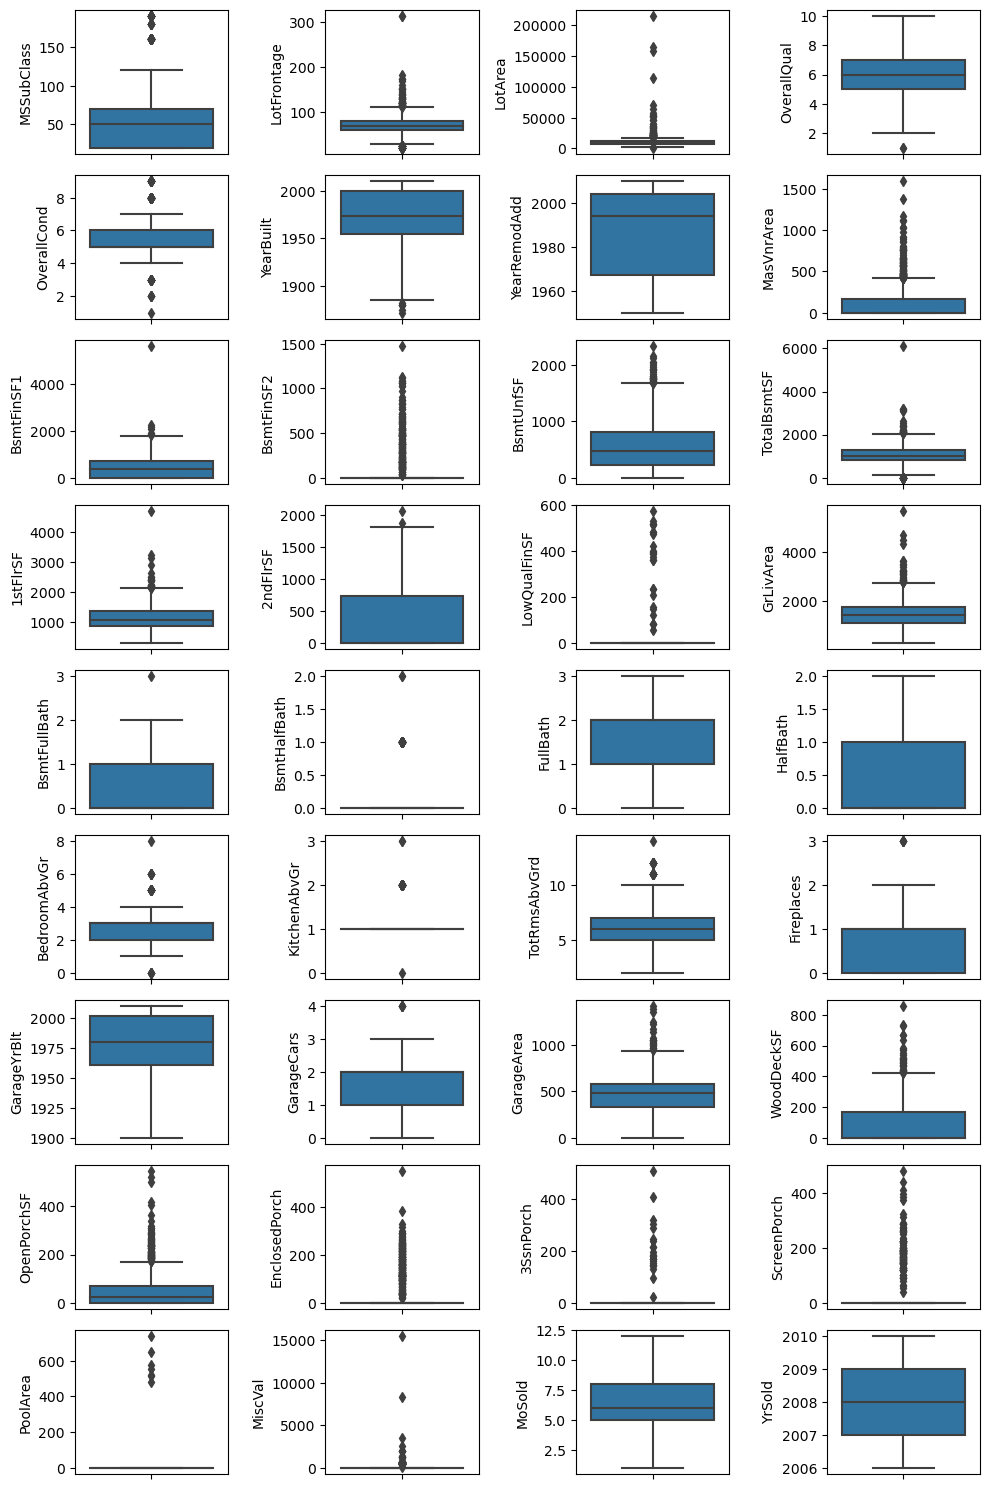

In [20]:
# Looking for Outliers

# In the statistics lesson, we learned that box plots give us a good overview of our data. From the distribution of 
# observations in relation to the upper and lower quartiles, we can spot outliers. Let’s see this in action with the 
# boxplot() method and a for loop to plot all the attributes in one go:

fig = plt.figure(figsize=(10, 15))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

In [17]:
high_quant = housing.quantile(.999)
high_quant['LotArea']

162062.06000000096

In [ ]:
# 📝 From the boxplots we can see that for instance LotFrontage values above 200 and LotArea above 150000 can be 
# marked as outliers. However, instead of relying on our own “visual sense” to spot patterns and define the range 
# for outliers, when doing data cleaning, we will use the knowledge of percentiles to be more accurate. For now our
# takeaway from this analysis is that we need to take care of outliers in the data cleaning phase.

# Just-for-fun plot

# Our brains are very good at spotting patterns on pictures, but sometimes we need to play around with visualization
# parameters and try out different kind of plots to make those patterns stand out. Let’s create a fun example plot
# for learning to play with visualizations, especially when we want to analyze relations among multiple variables at 
# once.

# We are going to look at the prices. The radius of each circle represents GrLivArea (option s), and the color
# represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from
# blue (low values) to red (high prices).

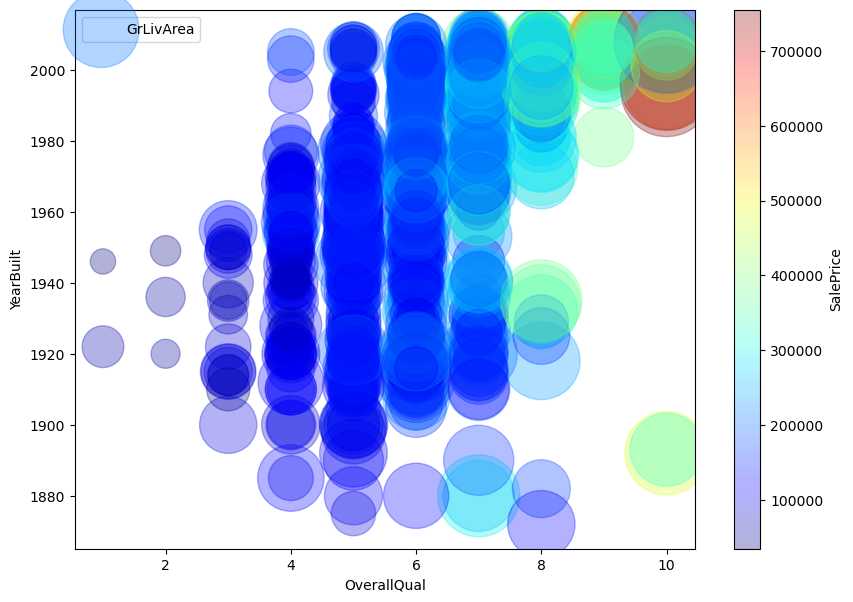

In [24]:
housing.plot(kind="scatter", x="OverallQual", y="YearBuilt",  s=housing["GrLivArea"], label="GrLivArea", alpha=0.3, 
             figsize=(10,7), c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()

In [ ]:
# The plot above tells us that the housing prices are very much related to the YearBuilt (y-axis) and 
# OverallQual (x-axis). Newer and higher quality houses mean more expensive prices. This is shown increasing red
# going towards upper-right end of the plot and vice versa. Prices are also related to the GrLivArea, radius of the 
# circle.

# Correlations Among Numerical Attributes
# Correlation tells us the strength of the relationship between pairs of attributes. In an ideal situation, 
# we would
# have an independent set of features/attributes, but real data is not ideal. It is useful to know whether some 
# pairs of attributes are correlated and by how much because it is a good practice to remove highly correlated 
# features.

# We can use the corr() method to easily get the correlations and then visualize them using the heatmap()
# method – Python does feel like magic often, isn’t it?!

# The corr() method returns pairs of all attributes and their correlation coefficients in range [-1; 1], where 1 
# indicates positive correlation, -1 negative correlation and 0 means no relationship between variables at all.

<AxesSubplot:>

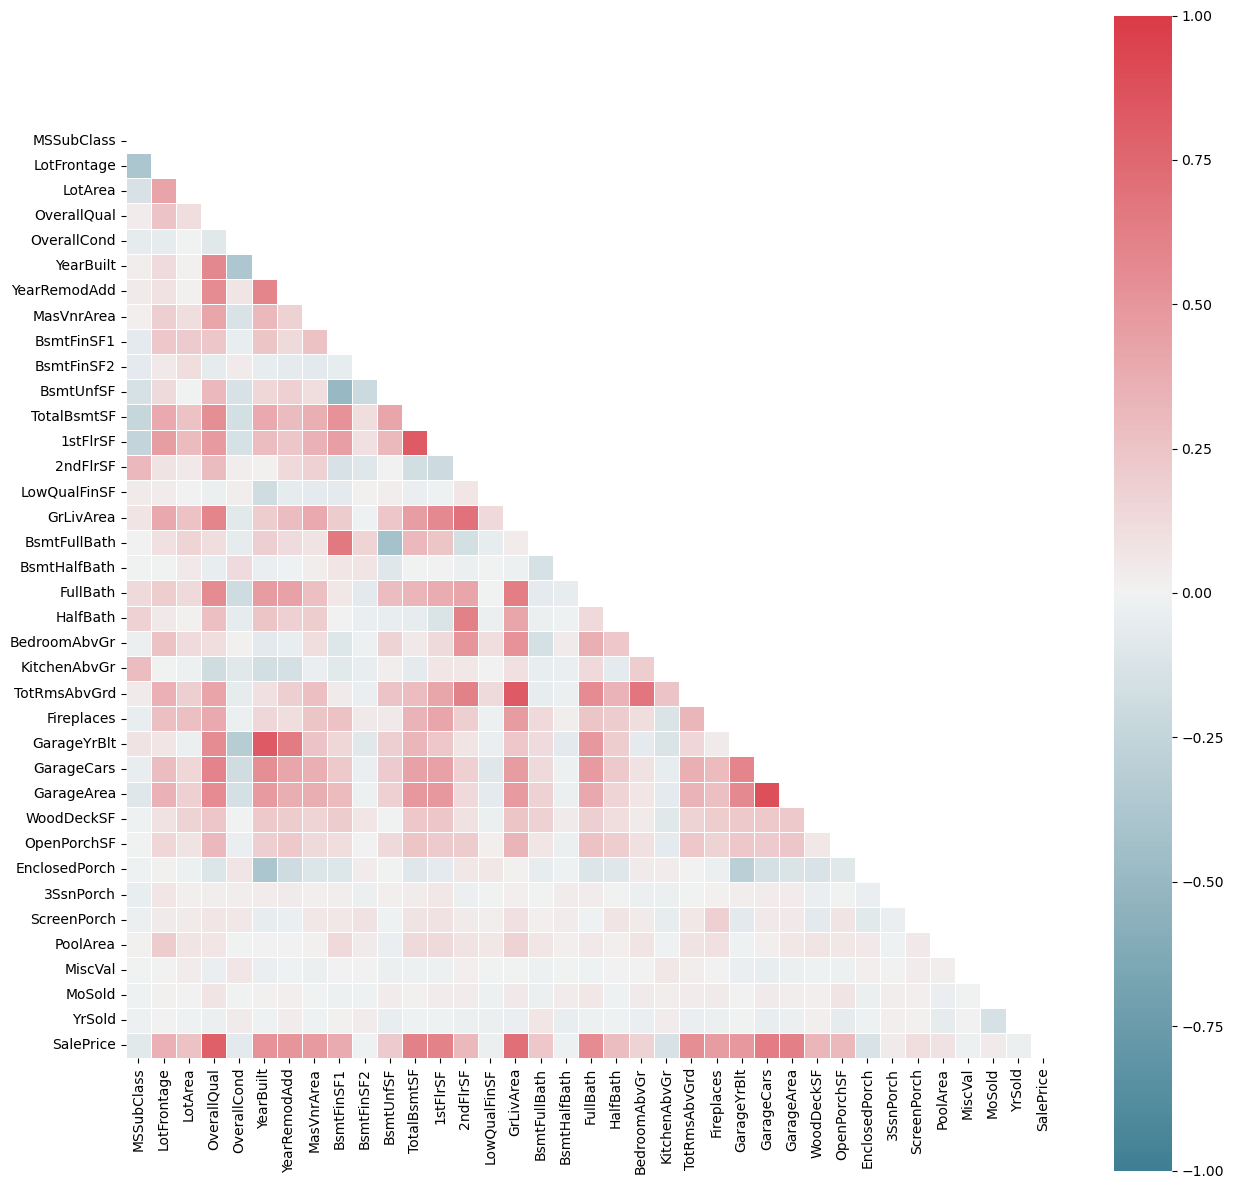

In [23]:
# Correlation of numerical attributes
corr = housing.corr()

# Using mask to get triangular correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)

In [ ]:
# From the heatmap, we can easily see that we have some variables that are highly correlated with 
# price (darker red) and that there are variables highly correlated among themselves as well. The heatmap is useful
# for a first high-level overview. Let’s get a sorted list of correlations among all the attributes and the target
# variable, SalePrice, for a deeper understanding of what’s going on.

With reference to the target SalePrice, the top correlated attributes are:

In [24]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
# Pair-wise scatter matrix

# We have a lot of unique pairs of variables i.e. N(N - 1)/2. Joint distribution can be used to look for a 
# relationship between all of the possible pairs, two at a time.

# For the sake of completeness, we might want to display a rough joint distribution plot for each pair of variables.
# This can be done by using pairplot()from sns. Since we have a fairly big N, so we are going to create scatter 
# plots for only some of the interesting attributes to get a visual feel for these correlations.

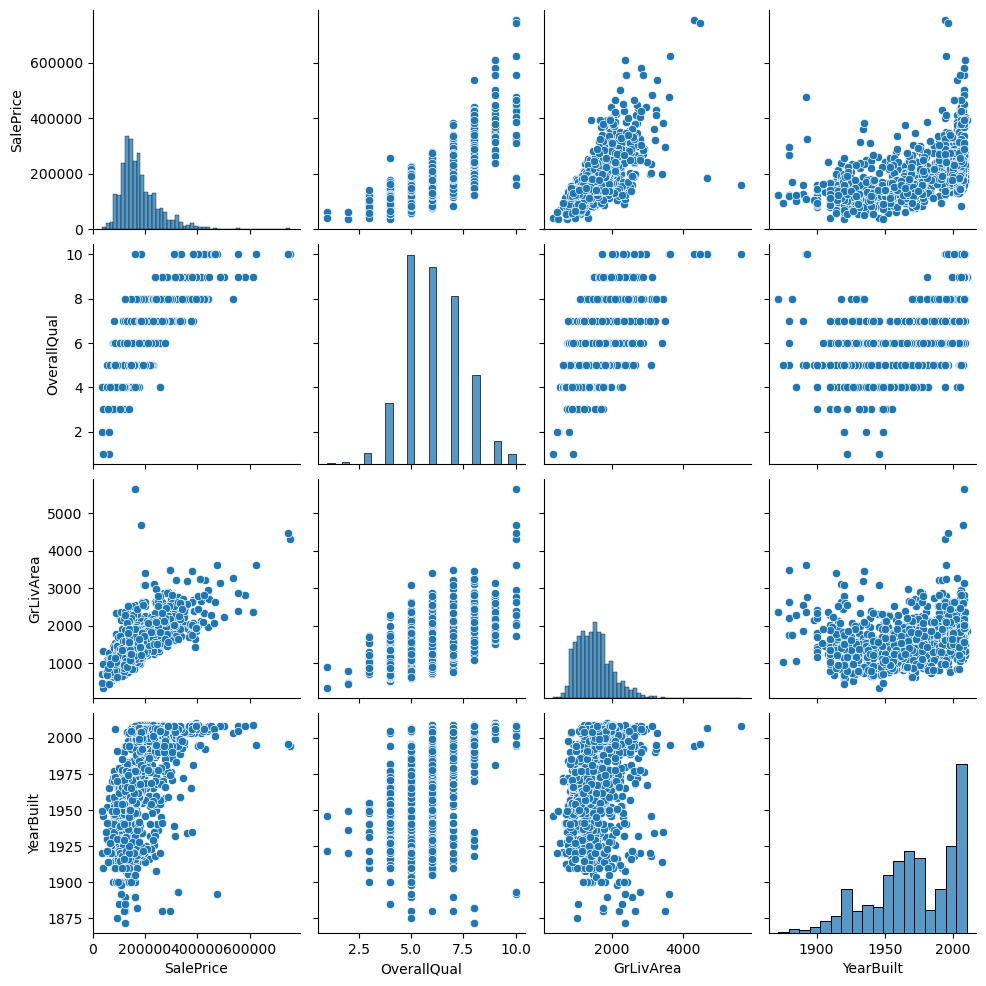

In [25]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[col])

In [28]:
# # Only important correlations and not auto-correlations
# threshold = 0.5
# important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
#     .unstack().dropna().to_dict()

# unique_important_corrs = pd.DataFrame(
#     list(set([(tuple(sorted(key)), important_corrs[key]) \
#     for key in important_corrs])), columns=['attribute pair', 'correlation'])

# # sorted by absolute value
# unique_important_corrs = unique_important_corrs.ix[
#     abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [23]:
unique_important_corrs

,attribute pair,correlation
16,"(GarageArea, GarageCars)",0.882475
36,"(GarageYrBlt, YearBuilt)",0.825667
14,"(GrLivArea, TotRmsAbvGrd)",0.825489
26,"(1stFlrSF, TotalBsmtSF)",0.819530
15,"(OverallQual, SalePrice)",0.790982
10,"(GrLivArea, SalePrice)",0.708624
29,"(2ndFlrSF, GrLivArea)",0.687501
11,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
25,"(BsmtFinSF1, BsmtFullBath)",0.649212
24,"(GarageYrBlt, YearRemodAdd)",0.642277


Looking at the graphs for the highest corr var

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

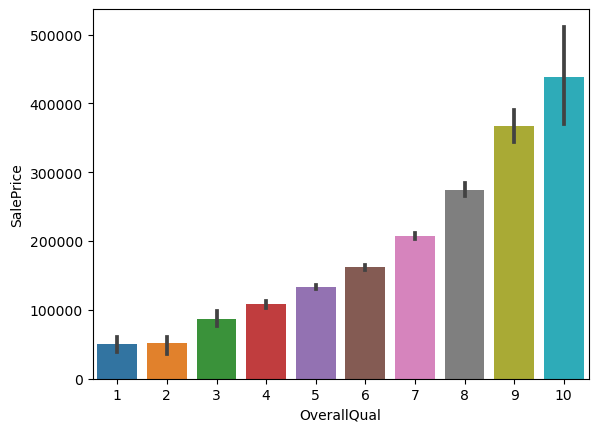

In [25]:
sns.barplot(housing.OverallQual, housing.SalePrice)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

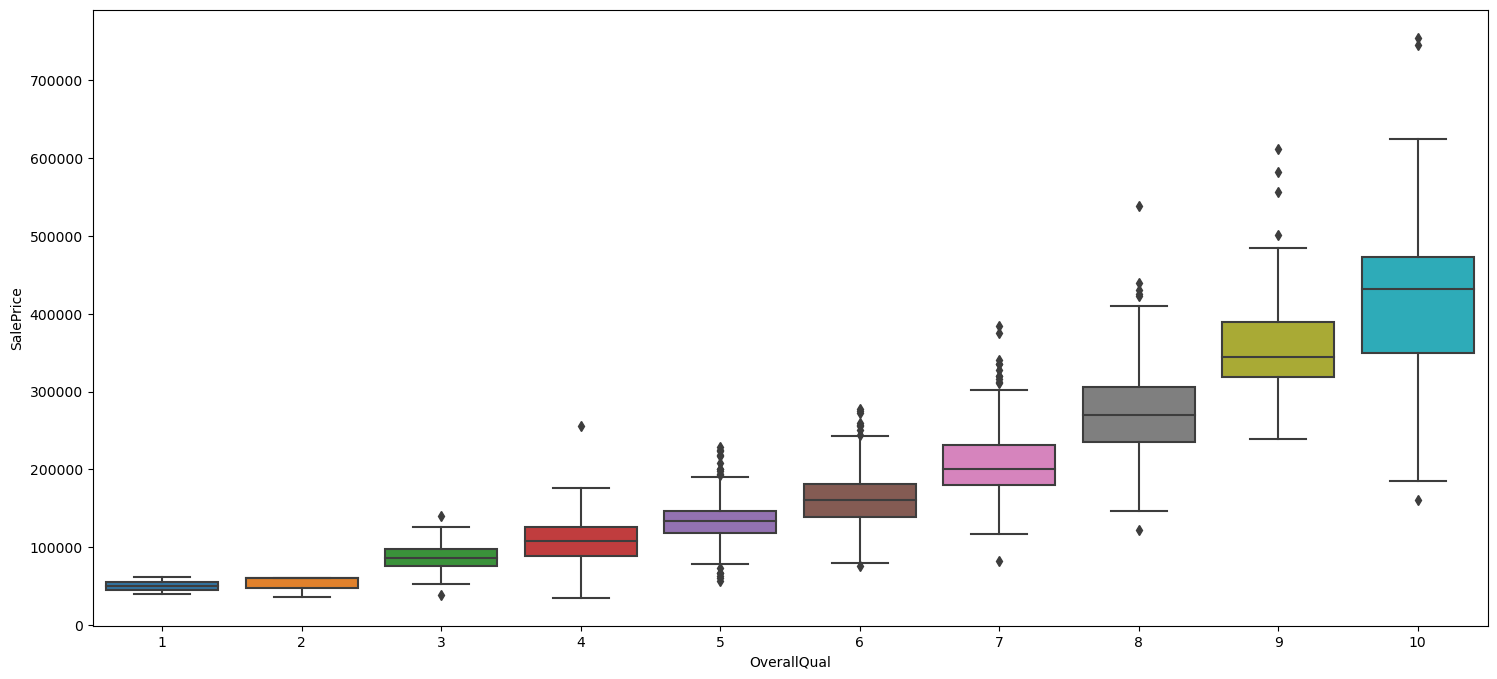

In [26]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=housing.OverallQual, y=housing.SalePrice)

In [27]:
# Now we can clearly see how prices change with quality, higher quality, higher price is so obvious. 
# But we can also notice that at higher qualities there is much higher variability in prices.

# What about the age of the house? Let’s look at that as well.

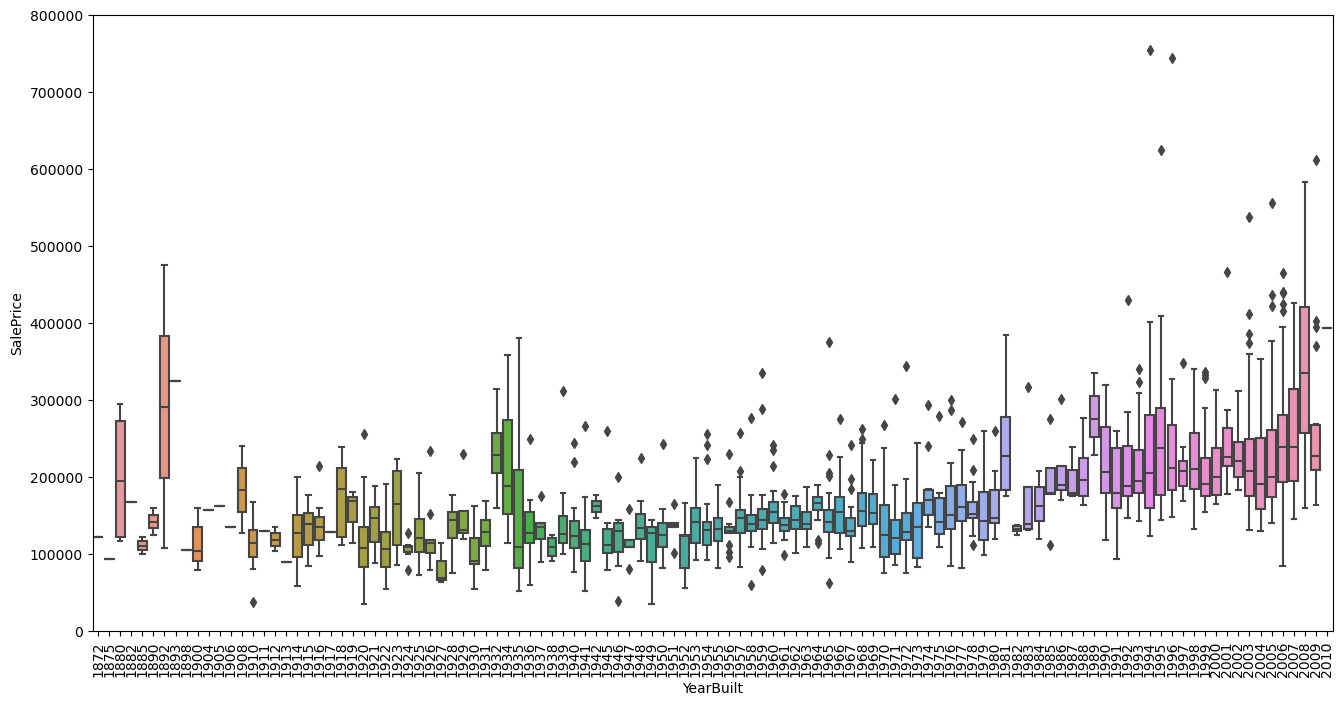

In [28]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
# We can see that some of the very old houses are expensive, but overall the newest houses tend to have higher prices.

# From our correlations list, we also know that GarageArea and GarageCars both also have a high correlation with 
# price, but do we need both? Both common sense and the heat map suggest that these two variables are highly 
# correlated among themselves, so only one should be sufficient for modeling purposes. In order to talk with 
# numbers and data, let’s also look at the values for correlations among attributes with regard to each other as 
# well, not just with the target variable.

# To avoid getting correlations for a variable with its own self, we can use the knowledge that a perfect 
# correlation of 1.0 indicates that we are looking at self-correlations. We will drop these from our results. 
# We are also going to sort our results from the most correlated pair to the least.

In [30]:
# Only important correlations and not auto-correlations
# threshold = 0.5
# important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) \
#     .unstack().dropna().to_dict()

# unique_important_corrs = pd.DataFrame(
#     list(set([(tuple(sorted(key)), important_corrs[key]) \
#     for key in important_corrs])), columns=['attribute pair', 'correlation'])

# # Sorted by absolute value
# unique_important_corrs = unique_important_corrs.iloc[
#     abs(unique_important_corrs['correlation']).argsort()[::-1]]

# unique_important_corrs

In [ ]:
# We can see that we have many highly correlated attributes and these results confirm our common sense analysis.

# 📝 We can take some notes here for the feature selection phase where we are going to drop the highly correlated
# variables. For example, GarageCars and GarageArea are highly correlated but since GarageCars has a higher 
# correlation with the target variable, SalePrice, we are going to keep GarageCars and drop GarageArea.
# We will also drop the attributes that have almost no correlation with price, like MoSold, 3SsnPorch and BsmtFinSF2.

#### Exploring Categorical Variables

In [33]:
# Let’s print again the names of the categorical columns again and then handpick some of the interesting ones 
# for visual analysis.
cat_columns = housing.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


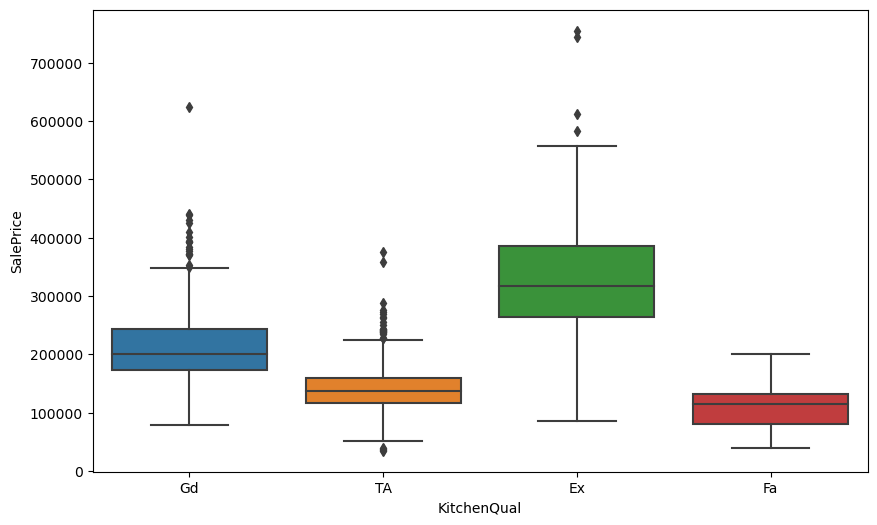

In [34]:
# Say we want to look at the impact of KitchQual on price:
var = housing['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=var)
plt.show()

In [ ]:
# We can now see that Ex seems to be the more expensive option while Fa brings the prices down.
# What about the style of the houses? Which styles do we have and how do they impact prices?

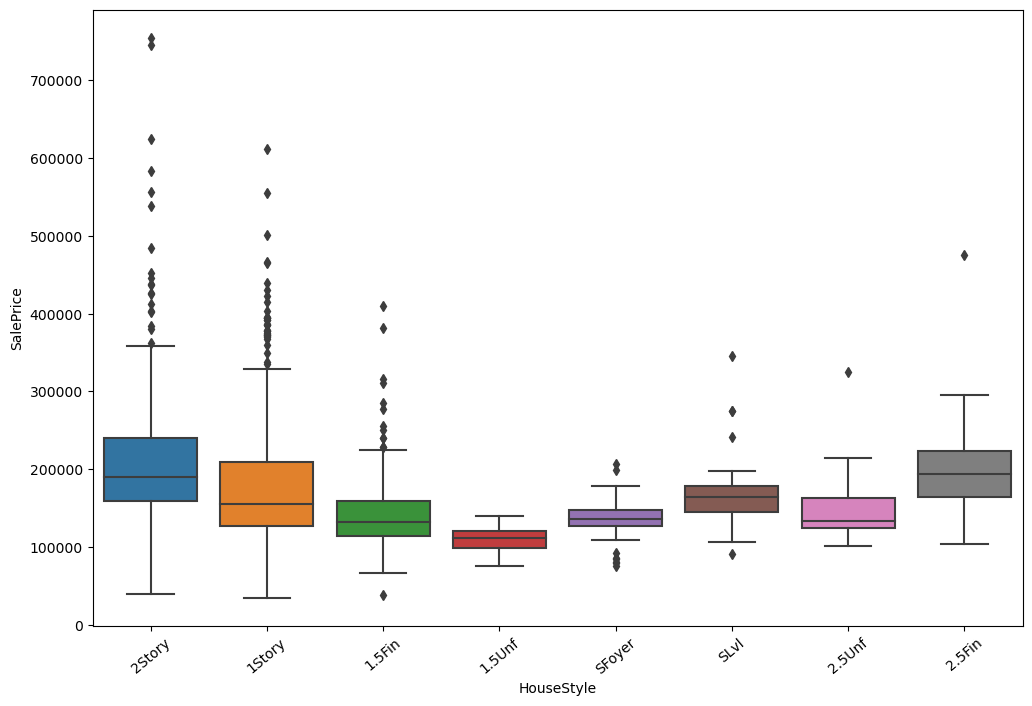

In [38]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=housing.SalePrice, x=housing.HouseStyle)
plt.xticks(rotation=40)
plt.show()

In [ ]:
# We can see that 2Story houses have the highest variability in prices and they also tend to be more expensive, 
# while 1.5Unf are the cheapest option.

# Say we want to get the frequency for each of these types, we can use the countplot() method from sns like so:

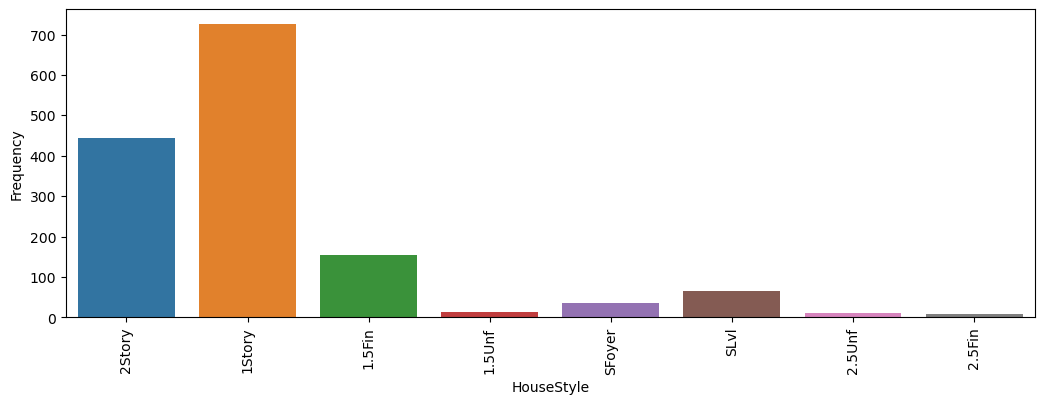

In [39]:
## Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='HouseStyle', data=housing)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [41]:
# Now we know that most of the houses are 1Story type houses. Say we do not want a frequency distribution plot,
# but only the exact count for each category, we can get that easily from the DataFrame directly:

In [42]:
housing["HouseStyle"].value_counts() 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

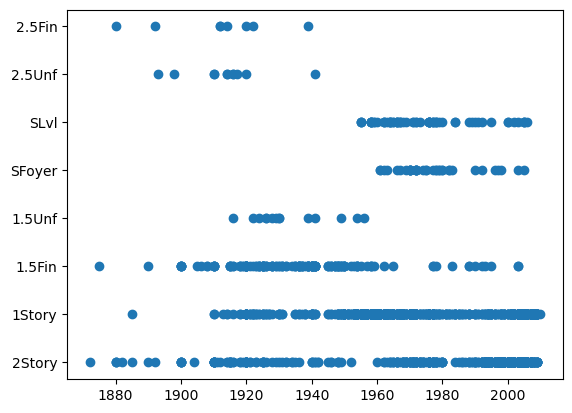

In [43]:
# We are also curious to see if the style of the houses has changed over the years, so let’s plot the two variables
# against each other.
plt.scatter(housing['YearBuilt'],housing['HouseStyle'])

#### 2. Data Preprocessing - Prepare the Data for Machine Learning Algorithms
- Dealing with missing/null values
<!-- We took our notes in the exploratory phase, now it’s time to act on them and prepare our data for the machine learning algorithms. Instead of just doing this manually, we will also learn how to write functions where possible. -->



In [45]:
# Deal With Missing Values
# Let’s get a sorted count of the missing values for all the attributes.
housing.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [ ]:
# From the results above we can assume that PoolQC to Bsmt attributes are missing for the houses that do not have 
# these facilities (houses without pools, basements, garage etc.). Therefore, the missing values could be filled in
# with “None”. MasVnrType and MasVnrArea both have 8 missing values, likely houses without masonry veneer.

# What should we do with all this missing data?

# Most machine learning algorithms cannot work with missing features, so we need to take care of them. Essentially, 
# we have three options:

# Get rid of the corresponding houses.

# Get rid of the whole attribute or remove the whole column.

# Set the missing values to some value (zero, the mean, the median, etc.).

# We can accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods.

# 📌Note: Whenever you choose the third option, say imputing values using the median, you should compute the median 
#     value on the training set, and use it to fill the missing values in the training set. But you should also 
#     remember to later replace missing values in the test set using the same median value when you want to evaluate 
#     your system, and also once the model gets deployed to replace missing values in new unseen data.

In [ ]:

# We are going to apply different approaches to fix our missing values, so that we can various approaches in action:

# We are going to replace values for categorical attributes with None.
# For LotFrontage, we are going to go a bit fancy and compute the median LotFrontage for all the houses in the same
# neighborhood, instead of the plain median for the entire column, and use that to impute on a neighborhood by 
# neighborhood basis.
# We are going to replace missing values for most of the numerical columns with zero and one with the mode.
# We are going to drop one non-interesting column, Utilities.
# Right now, we are going to look at how to do these fixes by explicitly writing the name of the column in the code.
# Later, in the upcoming section on transformation pipelines, we will learn how to handle them in an automated manner
# as well.

In [46]:
# Imputing Missing Values

housing_processed = housing

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

# Replace missing values for categorical columns with None
for cat in cat_cols_fill_none:
    housing_processed[cat] = housing_processed[cat].fillna("None")
    
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
housing_processed['LotFrontage'] = housing_processed.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))    

# GarageYrBlt, GarageArea and GarageCars these are numerical columns, replace with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    housing_processed[col] = housing_processed[col].fillna(int(0))
    
#MasVnrArea : replace with zero
housing_processed['MasVnrArea'] = housing_processed['MasVnrArea'].fillna(int(0))

#Use the mode value 
housing_processed['Electrical'] = housing_processed['Electrical'].fillna(housing_processed['Electrical']).mode()[0]

#There is no need of Utilities so let's just drop this column
housing_processed = housing_processed.drop(['Utilities'], axis=1)

In [47]:
# Get the count again to verify that we do not have any more missing values
housing_processed.isnull().apply(sum).max()

0

In [ ]:
# Deal With Outliers
# To remove noisy data, we are going to remove houses where we have some attribute that is above the 0.999 quantile,
# highly abnormal datapoint. We can do this by invoking the quantile() method on the DataFrame and then filtering
# based on the knowledge of the quantiles for each attribute, like so:

#### Addressing outliers

In [50]:
num_attributes = housing_processed.select_dtypes(exclude='object')

high_quant = housing_processed.quantile(.999)

for i in num_attributes.columns:
    housing_processed = housing_processed.drop(housing_processed[i][housing_processed[i]>high_quant[i]].index)

housing_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 1458
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1394 non-null   object 
 1   LotFrontage    1394 non-null   float64
 2   LotArea        1394 non-null   int64  
 3   Street         1394 non-null   object 
 4   Alley          1394 non-null   object 
 5   LotShape       1394 non-null   object 
 6   LandContour    1394 non-null   object 
 7   LotConfig      1394 non-null   object 
 8   LandSlope      1394 non-null   object 
 9   Neighborhood   1394 non-null   object 
 10  Condition1     1394 non-null   object 
 11  Condition2     1394 non-null   object 
 12  BldgType       1394 non-null   object 
 13  HouseStyle     1394 non-null   object 
 14  OverallQual    1394 non-null   int64  
 15  OverallCond    1394 non-null   int64  
 16  YearBuilt      1394 non-null   int64  
 17  YearRemodAdd   1394 non-null   int64  
 18  RoofStyl

In [ ]:
# Invoking the info() method on the updated DataFrame tells us that we are left with 1422 rows now.

# Deal With Correlated Attributes
# Using highly-correlated features when creating machine learning models can impact performance negatively. 
# As we saw in the numerical analysis section, we have quite a few correlated attributes. For example, 
# we concluded that we can drop GarageArea because it is highly correlated with GarageCars and the reason for 
# preferring GarageCars is because it is more correlated with price than area. (Pull out your notes from exploratory
# analysis at this step.)

In [49]:
#### Remove highly correlated features
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_processed = housing_processed.drop(attributes_drop, axis=1)

In [ ]:
# Handle Text And Categorical Attributes
# Most Machine Learning algorithms need numbers as input, so let’s convert all the categories from text to numbers.

# A common approach to deal with textual data is to create one binary attribute for each category of the feature: 
# for example, for type of houses, we would have one attribute equal to 1 when the category is 1Story
# (and 0 otherwise), another attribute equal to 1 when the category is 2Story (and 0 otherwise), and so on. 
# This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 
# (cold). The new attributes are also known as dummy attributes. Scikit-Learn provides a OneHotEncoder class to 
# convert categorical values into one-hot vectors:

# Scikit-Learn is the most widely used library for working on machine learning/data science projects. It is simple,
# easy to use and it provides many efficient tools for data mining, data analysis and modeling. In short, it is 
# awesome!

In [53]:
#### Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_processed)
housing_processed_1hot

<1394x7170 sparse matrix of type '<class 'numpy.float64'>'
	with 97580 stored elements in Compressed Sparse Row format>

In [52]:
# Notice that as a result of creating new one-hot attributes our total number of attributes has jumped to 7333! 
# We have a 1422x7333 matrix which is mostly sparse (zeros).

In [ ]:
# Feature Scaling

# Feature Scaling is one of the most important transformations we need to apply to our data. As we said earlier, 
# machine learning algorithms mostly do not perform well if they are fed numerical attributes with very different 
# scales as input. This is the case for the housing data. If you go back and look at the distribution plots that 
# we created in the very beginning, we notice that LotArea ranges from 0 to 200000, while GarageCars ranges only
# from 0 to 4.

# There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

# Min-max scaling (also known as normalization): this is a simple technique. Values are shifted and rescaled so 
# that they end up ranging from 0 to 1. This can be done by subtracting the min value and dividing by the max minus the
# min, but fortunately Scikit-Learn provides a transformer (we will talk about transformers in a bit) called 
# MinMaxScaler to do this in a hassle-free manner. This transformer also provides the feature_range hyperparameter 
# so that we can change the range if for some reason we don’t want the 0 to 1 scale.

 
# Standardization: this is a more sophisticated approach. Remember the lessons from statistics? Standardization is
# done by first subtracting the mean value (so standardized values always have a 0 mean), and then dividing by
# the standard deviation so that the resulting distribution has unit variance. Since it only cares about “fixing” 
# the mean and variance, standardization does not limit values to a specific range, which may be problematic for 
# some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization
# is much less affected by outliers. Say Bill Gates walks into a bar, suddenly the median income for people in the
# bar would shoot up to the moon, so min-max scaling would be a poor choice for scaling here. On the other hand, 
# standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for 
# standardization.

 
# Instead of applying these scaling transformations on a column-by-column basis like we have been handling data 
# preparation so far, in the next lesson, we are going to understand how to use transformation pipelines in order 
# to do all this work in a more automated and cleaner fashion.

In [ ]:
# 3. Transformation Pipelines
# As you can see, from imputing missing values to feature scaling to handling categorical attributes, we have many 
# data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn is here to make 
# our life easier: Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

# 📌 Note: Creating transformation pipelines is optional. It is handy when dealing with a large number of 
#     attributes, so it is a good-to-know feature of Scikit-Learn. In fact, at this point we could directly move on
#     to create our machine learning model. However, for learning how things are done, we are going to look at
#     working with pipelines.


# Some Scikit-Learn terminology:

# Estimators: An object that can estimate some parameters based on a dataset, e.g., an imputer is an estimator). 
# The estimation itself is performed by simply calling the fit() method.

# Transformers: Some estimators (such as an imputer) can also transform a dataset; these are called transformers. 
# The transformation is performed by the handy and easy to use transform() method with the dataset to transform as a
# parameter.

# Predictors: Some estimators are capable of making predictions given a dataset; they are called predictors. 
# For example, the LinearRegression model is a predictor. A predictor has a predict() method that takes a dataset of
# new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the 
# quality of the predictions given a test set.

# Based on some of the data preparation steps we have identified so far, we are going to create a transformation 
# pipeline based on SimpleImputer(*) and StandardScalar classes for the numerical attributes and OneHotEncoder for 
# dealing with categorical attributes.

# (*)Scikit-Learn provides a very handy class, SimpleImputer to take care of missing values. You just tell it the 
# type of imputation, e.g. by median, and voila, the job is done. We have already talked about the other two classes.

# First, we will look at a simple example pipeline to impute and scale numerical attributes. Then we will create a 
# full pipeline to handle both numerical and categorical attributes in one go.

# The numerical pipeline:

#### Transformation Pipelines

In [54]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Separate features and target variable
housing_X = housing_processed.drop("SalePrice", axis=1)
housing_y = housing_processed["SalePrice"].copy()

# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

# Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [ ]:
# Note that we have separated the SalePrice attribute into a separate variable, because for creating the
# machine learning model, we need to separate all the features, housing_X, from the target variable, housing_y.

# The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. The names can be
# whatever we want as long as they are unique and without double underscores, “__”.

# The pipeline is run sequentially, one transformer at a time, passing the output of each call as the parameter 
# to the next call. In this example, the last estimator is a StandardScaler (a transformer), and the pipeline
# applies all the transforms to the data in sequence.

# So far, we have handled categorical and numerical attributes separately. It is more convenient and clean to 
# have a single transformer handle all columns, applying the appropriate transformations to each column. 
# Scikit-Learn comes to the rescue again by providing the ColumnTransformer for the very purpose. 
# Let’s use it to apply all the transformations to our data and create a complete pipeline.

# (num_pipeline is the numerical pipeline from the previous step)

In [55]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


# Description before applying transforms
print(housing_y.describe())

# Apply log-transform to SalePrice
housing_y_prepared  = np.log(housing_y)

# Run the transformation pipeline on all the other attributes
housing_X_prepared = full_pipeline.fit_transform(housing_X)

# Description before applying transforms
print(housing_y_prepared.describe())

housing_X_prepared

count      1394.000000
mean     175905.507891
std       70258.653189
min       35311.000000
25%      129000.000000
50%      160000.000000
75%      208100.000000
max      556581.000000
Name: SalePrice, dtype: float64
count    1394.000000
mean       12.005018
std         0.380561
min        10.471950
25%        11.767568
50%        11.982929
75%        12.245773
max        13.229568
Name: SalePrice, dtype: float64


<1394x279 sparse matrix of type '<class 'numpy.float64'>'
	with 94792 stored elements in Compressed Sparse Row format>

In [ ]:
# What is happening in the ColumnTransformer?

# We import the ColumnTransformer class.
# We get the list of numerical column names and the list of categorical column names.
# We construct a ColumnTransformer. The constructor requires a list of tuples, where each tuple contains a name, a 
# transformer, and a list of names of columns that the transformer should be applied to.

# In this example, we specify that the numerical columns should be transformed using the num_pipeline that we 
# defined earlier, and the categorical columns should be transformed using a OneHotEncoder. Finally, we apply this 
# ColumnTransformer to the housing data using fit_transform().
# And that’s it! We have a preprocessing pipeline that takes the housing data and applies the appropriate 
# transformations to each column.

In [ ]:
# 4. Create and Assess Machine Learning Models

# Train and Evaluate Multiple Models on the Training Set
# At last! We framed the problem, we got the data, explored it, prepared the data, and wrote transformation 
# pipelines to clean up the data for machine learning algorithms automatically. We are now ready for the most 
# exciting part: to select and train a machine learning model.

# The great news is that thanks to all the previous steps, things are going to be way simpler than you might think! 
# Scikit-learn makes it all very easy!

# Create a Test Set

# As a first step we are going to split our data into two sets: training set and test set. We are going to train our
# model only on part of the data because we need to keep some of it aside in order to evaluate the quality of our
# model.

# Creating a test set is quite simple: the most common approach is to pick some instances randomly, typically 20% 
# of the dataset, and set them aside. The simplest function for doing this Scikit-learn’s train_test_split().

# It is a common convention to name the feature set with X in the name, X_train and X_test, and the data with the
# variable to be predicted with y in the name, y_train and y_test:

#### Select and Train Models 

In [56]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

In [57]:
# With the training and test data in hand, creating a model is really easy. Say we want to create a 
# Linear Regression model. In general, this is what it looks like:
# Import modules
from sklearn.linear_model import LinearRegression

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 88.10135573435417


In [60]:
# And that’s it! There you have a linear regression model in three lines of code!

# Now we want to create and compare multiple models, so we are going to store the results from the evaluation of
# each model in a variable. Since we are dealing with a regression problem, we are also going to use RMSE as the
# main performance measure to assess the quality of our models.

# RMSE (Root Mean Square Error) is a typical performance measure for regression problems. It gives an idea of how
# much error the system typically makes in its predictions by measuring the differences between values predicted by 
# the model and the actual values, actual prices vs predicted prices. It is the standard deviation of the prediction
# errors, a measure of how spread out these errors are from the line of best fit.

# The equation for RMSE is simple: we sum the square of all the errors between predicted values and actual values, 
# we divide by the total number of test examples and then we take the square root of the results:

# Again, not to worry about implementing formulas, because we are going to measure RMSE of our regression models 
# using Scikit-learn’s mean_squared_error function.

# One more thing to remember is that we took the log of our target variable, SalePrice. This means that before 
# evaluating RMSE, we need to convert prices back to their original values. Inverse of the log means to simply take
# the exponential of the log values, i.e., we will simply call np.exp(). And since we need to get the inverse 
# multiple times, we are going to write a function as a good coding practice, like so:

def inv_y(y):
    return np.exp(y)

In [62]:
!pip install xgboost

  Using cached xgboost-1.7.4-py3-none-manylinux2014_x86_64.whl (193.6 MB)


In [63]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost

# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collect RMSE for the different algorithms: "algorithm name + rmse"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

# Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

# Model 1: Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

In [64]:
# Model 2: Decision Trees. Define the model. ===================================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

In [65]:
# Model 3: Random Forest. Define the model. =====================================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

In [67]:
# Model 4: Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score

In [ ]:
# We have trained four different models. As you can see, training from one model to another just means that you 
# just select a different one from Scikit-Learn’s library and change a single line of code!
# Comparative analysis of the models and their errors
# Now let’s get the performance measures for our models in sorted order, from best to worst:

In [70]:
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
LinearRegression    22696.0
GradientBoosting    25316.0
RandomForest        26747.0
DecisionTree        33888.0
dtype: float64

In [71]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
LinearRegression    88.101
GradientBoosting    87.548
RandomForest        84.921
DecisionTree        73.165
dtype: float64

In [ ]:
# The simplest model, Linear Regression, seems to be performing the best, with predicted prices that are off by 
# about 24K. This might or might not be an acceptable amount of deviation depending on the desired level of accuracy
# or the metric we are trying to optimize based on our business objective.

# General Notes
# A large prediction error usually means an example of a model underfitting the training data. When this happens it
# can mean that the features do not provide enough information to make good predictions, or that the model is not 
# powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training
# algorithm with better features, or to reduce the constraints on the model.

# In this case, we have trained more powerful models, capable of finding complex nonlinear relationships in the 
# data,
# like a DecisionTreeRegressor as well. However, the more powerful model seems to be performing worse! The Decision
# Tree model is overfitting badly enough to perform even worse than the simpler Linear Regression model.

# Possible solutions to deal with overfitting are to simplify the model, constrain it, or get more training data.

# Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their
# predictions. Building a model on top of many other models is called Ensemble Learning, and it is used to improve
# the performance of the algorithms. In fact, we can see that Random Forests are performing much better than 
# Decision Trees.

# Evaluation Using Cross-Validation
# One way to evaluate models is to split the training set into a smaller training set and a validation set, then 
# train the models against the smaller training set and evaluate them against the validation set. This is called 
# cross-validation. We can use Scikit-Learn’s cross-validation feature, cross_val_score, for this.

# Let’s perform a K-fold cross-validation on our best model: the cross-validation function randomly splits the 
# training set into K distinct subsets or folds, then it trains and evaluates the model K times, picking a 
#different fold for evaluation every time and training on the other 9 folds. The result is an array containing the
# K  evaluation scores:

#### Cross validation

In [72]:
from sklearn.model_selection import cross_val_score

# Perform K fold cross-validation, where K=10
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)

# Display results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(linear_rmse_scores)

Scores: [0.13087582 0.11145238 0.11021163 0.11691679 0.12828859 0.11635097
 0.12619284 0.1072849  0.11763754 0.10206721]
Mean: 0.11672786727101114
Standard deviation: 0.008937576854765138


In [73]:
scores = cross_val_score(rf_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rf_rmse_scores)

Scores: [0.14289693 0.11193816 0.12182887 0.14077821 0.14987762 0.16539617
 0.12336285 0.12237962 0.11772823 0.12656787]
Mean: 0.13227545348587866
Standard deviation: 0.015925538249581074


In [77]:
# From the results, we notice that cross-validation gives us the mean and standard deviation for the scores as well.
# But cross-validation comes at the cost of training the model several times, so it is not always the most viable
# choice.

# 📌 Note: In general, save your models so that you can come back to any model you want. Make sure to save the
# hyperparameters, the trained parameters, and also the evaluation scores. Why? Because this will allow you to 
# easily compare scores across model types and compare the types of errors they make. This will especially be useful
# when the problem is complex, your notebook is huge and/or model training time is very large.

# Scikit-learn models can be saved easily using the pickle module, or using sklearn.externals.joblib, which is more
# efficient at serializing large NumPy arrays:

# from sklearn.externals import joblib
# import joblib

# # Save model
# joblib.dump(my_model, "my_model.pkl")

# # Load saved model
# my_model_loaded = joblib.load("my_model.pkl")


In [ ]:
# 5. Fine-Tune Your Model#
# Say our best performing model was the RandomForestRegressor. This is a model that has many input hyperparameters 
# that can be tweaked for improving performance. For example, we could have a forest with 100 or 1000 trees, or we
# could use 10 or 50 features during random selection. What are the best values for these hyperparameters to pass as
# input to the model for training?

# Grid Search
# Should we fiddle with all the possible values manually and then compare results to find the best combination of 
# hyperparameters? This would be really tedious work, and we would end up exploring only a few possible combinations.

# Luckily, we can use Scikit-learn’s GridSearchCV to do this tedious search work for us. All we need to do is tell 
# it which hyperparameters we would like to explore and which values to try out, and it will evaluate all the 
# possible combinations of hyperparameter values, using cross-validation.

# For example, let’s see how to search for the best combination of hyperparameter values for the 
# RandomForestRegressor:

#### Fine-Tune Your Model

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]}, {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# Note: If we are clueless about which value a hyperparameter should have, a simple approach is to pass consecutive
# powers of 10, or a smaller number if you want a more fine-grained search to GridSearch.

# We can use best_params_ to visualize the best values for the passed hyperparameters, and best_estimator_ to get
# the fine-tuned model:

In [51]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 50, 'n_estimators': 150}

In [52]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=50, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.16045887516202725 {'max_features': 10, 'n_estimators': 10}
0.1463990948564421 {'max_features': 10, 'n_estimators': 50}
0.1412026947487663 {'max_features': 10, 'n_estimators': 100}
0.14246253054769992 {'max_features': 10, 'n_estimators': 150}
0.14691746270767267 {'max_features': 20, 'n_estimators': 10}
0.13597115151245137 {'max_features': 20, 'n_estimators': 50}
0.1339317384657923 {'max_features': 20, 'n_estimators': 100}
0.13586344839124506 {'max_features': 20, 'n_estimators': 150}
0.14151866730008977 {'max_features': 30, 'n_estimators': 10}
0.1340031945390629 {'max_features': 30, 'n_estimators': 50}
0.13223525140249814 {'max_features': 30, 'n_estimators': 100}
0.13125997327589092 {'max_features': 30, 'n_estimators': 150}
0.13940136029754568 {'max_features': 40, 'n_estimators': 10}
0.1328361901145508 {'max_features': 40, 'n_estimators': 50}
0.1300245720445149 {'max_features': 40, 'n_estimators': 100}
0.1298365980534873 {'max_features': 40, 'n_estimators': 150}
0.14116266819925172 {'m

In [ ]:
# Evaluate Using the Fine-Tuned Model
# Now that we know the optimal values for the hyperparameters
# (‘bootstrap’: False, ‘max_features’: 50, ‘n_estimators’: 150), let’s plug them in and see if our
# Random Forest model has improved compared to the vanilla Random Forest model that we trained earlier when we 
# trained multiple models at once:

In [54]:
rf_model_final = RandomForestRegressor(bootstrap=False,max_features=50, n_estimators=150, random_state=5)

rf_model_final.fit(X_train, y_train)
rf_final_val_predictions = rf_model_final.predict(X_test)
rf_final_val_rmse = mean_squared_error(inv_y(rf_final_val_predictions), inv_y(y_test))
np.sqrt(rf_final_val_rmse)

28801.819287572634

In [55]:
rf_model_final.score(X_test, y_test)*100

87.81704897477596

In [ ]:
# Wow! Our accuracy has gone up from about 84.8 to 87.8 while the RMSE has decreased from 31491 to 28801. 
# This is a significant improvement!

# In this example, we obtained a much better solution by setting the max_features hyperparameter to 50, and the
# n_estimators hyperparameter to 150. However, notice that LinearRegression is still performing better so we are
# going to choose it as our final model.

# Some More Ways to Perform Fine-Tuning
# There are many ways to perform fine-tuning. Among which two are discussed here:

# 1. Randomized Search
# The grid search approach is acceptable when we are exploring relatively few combinations, but when the number of 
# combinations of the hyperparameters is large, it is often preferable to use RandomizedSearchCV. This is similar
# to GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of 
# random combinations at every iteration.

# 2. Ensemble Methods
# Another way to fine-tune is to try to combine the models that perform best. The group, or ensemble, will often 
# perform better than the best individual model, just like Random Forests perform better than the 
# individual Decision Trees they rely on, especially if the individual models make very different types of errors.

In [56]:
feature_importances = grid_search.best_estimator_.feature_importances_

Let’s display these importance scores next to their corresponding attribute names:

In [57]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.13587910160757175, 'OverallQual'),
 (0.11448897858060943, 'GrLivArea'),
 (0.09581655010849015, 'YearBuilt'),
 (0.07582896748463265, 'GarageCars'),
 (0.046056980286277464, 'TotalBsmtSF'),
 (0.04487549401201833, '1stFlrSF'),
 (0.041393174102971615, 'FullBath'),
 (0.023880560131905645, 'LotArea'),
 (0.021393985092654423, 'YearRemodAdd'),
 (0.01724007555749671, '2ndFlrSF'),
 (0.015760931004710026, 'BsmtFinSF1'),
 (0.015735215913831282, 'LotFrontage'),
 (0.015286111385595777, 'Fireplaces'),
 (0.01068633452178631, 'TotRmsAbvGrd'),
 (0.008698353502217744, 'OverallCond'),
 (0.0061489973736860975, 'BsmtUnfSF'),
 (0.005958047979369089, 'OpenPorchSF'),
 (0.005208876302112425, 'MasVnrArea'),
 (0.0036112351500639174, 'WoodDeckSF'),
 (0.0034948654242381166, 'BedroomAbvGr'),
 (0.0031363147175676787, 'HalfBath'),
 (0.002912991933145176, 'RM'),
 (0.002525673214705328, 'RL'),
 (0.0017716519205522537, 'BsmtFullBath'),
 (0.0015500110819655765, 'EnclosedPorch'),
 (0.0011829609950252812, 'C (all)'),
 (0

In [ ]:
# 6. Present the Solution
# Now comes the phase where you need to showcase your results, to present your solution. Some handy pointers:

# Highlight what you have learned
# What worked and what did not
# What assumptions you made
# Your models limitations
# Create compelling presentations: use clear visualizations, easy to remember statements, avoid lots of text and use
# the power of story-telling!
# Use terminology that is tailored to the technical level of the audience.

# 📌Side Note: Say this housing example was a real project. The final performance of the model could be used to 
# understand if ML based solution can be used to replace human experts in the loop. Automating these tasks is useful
# because it means that the experts get to have more free time which they can dedicate to more interesting and 
# productive tasks.

# 7. Launch, Monitor, and Maintain the System
# Say we were working on a real project and after your awesome presentation, you got the approval to deploy your 
# solution for production. Now you’d need to get it ready for production. You can start doing this by plugging in 
# production data as input to your model and writing tests.

# When ML models are in production, it is crucial to have monitoring in place in order to check the system’s 
# performance at regular intervals and trigger alerts when things go bananas.

# Finally, you will likely need to train your models at regular intervals using fresh data. In order to avoid doing
# the same tasks over and over again, strive to automate this process as much as possible. Automating means that you
# can run updates at exact intervals without procrastination issues and your system will stay up-to-date and show 
# bad fluctuations over time.

# Of course, these steps are not needed if you are just building a model, say for a Kaggle competition. 
# In that case you can stop at fine-tuning!

# Congratulations, you have now successfully learned to perform exploratory analysis, prepare the data, create and 
# evaluate multiple machine learning models and fine-tune your best model! 🙌

# Practice Makes Perfect: Working With Real Data
# Now you have a good idea of what a machine learning/data science project looks like. You have gained familiarity 
# with great tools and techniques that you can use to train ML models. As it should be pretty obvious by now, much 
# of the work is in the data preparation step. In fact, first-timers are often surprised by how little time in a
# machine learning project is spent actually doing machine learning. But it makes sense if you consider how
# time-consuming it is to gather data, integrate it, clean it, and pre-process it, and how much trial and error 
# can go into feature design. Machine learning is not a one-shot process of building a dataset and running a 
# learner, but rather an iterative process of running the learner, analyzing the results, modifying the data and/or 
# the learner, and repeating.

# The machine learning algorithms are important but, when getting started, it is recommended to be comfortable with
# the overall process first and learn just a few algorithms well, rather than spending all your time in learning 
# advanced algorithms at the cost of ignoring the overall process.

# Your Turn Now!

# First, try to improve the performance of the model for the housing dataset by using different models, selecting
# different features, replacing GridSearchCV with RandomizedSearchCV, trying out a different set of algorithms, etc.
# Then select a dataset from a domain of your interest and go through the whole process from start to end. The key 
# is to practice, practice and then some more practice!

# Open Datasets
# There are thousands of open datasets, ranging across all sorts of domains, just waiting for you. Here are a few 
# popular places you can look at to get lots of open data:

# Kaggle datasets

# Amazon’s AWS datasets

# Wikipedia’s list of Machine Learning datasets

# I would recommend you start on Kaggle because you will have a good dataset to tackle, a clear goal, and people to
# share your experience with.

# Looking forward to hearing about all your great projects, and progress!👊



With this information, you may want to try dropping some of the less useful features 